# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the "correct" name. You will use `read_excel` instead of `read_csv`, *but you'll also need to install a new library*.

In [5]:
df = pd.read_excel("richpeople.xlsx")

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [91]:
print ("Nubmer of rows:", len(df))
print ("Number of cols:", len(df.columns))

Nubmer of rows: 1653
Number of cols: 30


In [92]:
print ("Columns:")
for column in df.columns:
    print ("-", column, ":", type(column))

Columns:
- year : <class 'str'>
- name : <class 'str'>
- rank : <class 'str'>
- citizenship : <class 'str'>
- countrycode : <class 'str'>
- networthusbillion : <class 'str'>
- selfmade : <class 'str'>
- typeofwealth : <class 'str'>
- gender : <class 'str'>
- age : <class 'str'>
- industry : <class 'str'>
- IndustryAggregates : <class 'str'>
- region : <class 'str'>
- north : <class 'str'>
- politicalconnection : <class 'str'>
- founder : <class 'str'>
- generationofinheritance : <class 'str'>
- sector : <class 'str'>
- company : <class 'str'>
- companytype : <class 'str'>
- relationshiptocompany : <class 'str'>
- foundingdate : <class 'str'>
- gdpcurrentus : <class 'str'>
- sourceofwealth : <class 'str'>
- notes : <class 'str'>
- notes2 : <class 'str'>
- source : <class 'str'>
- source_2 : <class 'str'>
- source_3 : <class 'str'>
- source_4 : <class 'str'>


## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [18]:
df[["name", "networthusbillion"]].sort_values("networthusbillion", ascending=False).head()

,name,networthusbillion
184,Bill Gates,76.0
226,Carlos Slim Helu,72.0
79,Amancio Ortega,64.0
1562,Warren Buffett,58.2
862,Larry Ellison,48.0


## 4) How many male billionaires are there compared to the number of female billionares? Do they have a different average wealth?

> **TIP:** The second part uses `groupby`, but the first part does not.

In [34]:
df["gender"].value_counts()

male      1473
female     180
Name: gender, dtype: int64

In [32]:
df.groupby("gender")["networthusbillion"].mean()

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

## 5) Who is the poorest billionaire? Who are the top 10 poorest billionaires?

In [44]:
poorest = df[df["networthusbillion"] == df["networthusbillion"].min()]
poorest[["name", "networthusbillion"]].head(1) #problem is, many people have same min wealth 1.0 bn

,name,networthusbillion
30,Alberto Alcocer,1.0


In [37]:
df[["name", "networthusbillion"]].sort_values("networthusbillion", ascending=True).head(10)

,name,networthusbillion
156,B.R. Shetty,1.0
1310,Rostam Azizi,1.0
1497,Tory Burch,1.0
476,Fred Chang,1.0
115,Angela Bennett,1.0
485,Fu Kwan,1.0
1318,Ryan Kavanaugh,1.0
1133,O. Francis Biondi,1.0
859,Lam Fong Ngo,1.0
456,Feng Hailiang,1.0


## 6) What is the most common source of wealth? Is it different between males and females?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???

In [47]:
df["typeofwealth"].value_counts()

inherited                   506
founder non-finance         467
self-made finance           344
privatized and resources    192
executive                   142
Name: typeofwealth, dtype: int64

In [60]:
men = df[df["gender"] == "male"]
men["typeofwealth"].value_counts()

founder non-finance         446
inherited                   364
self-made finance           338
privatized and resources    187
executive                   136
Name: typeofwealth, dtype: int64

In [62]:
women = df[df["gender"] == "female"]
women["typeofwealth"].value_counts()

inherited                   142
founder non-finance          21
executive                     6
self-made finance             6
privatized and resources      5
Name: typeofwealth, dtype: int64

## 7) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like oyu should use `groupby`, but don't! There's an easier way to count.

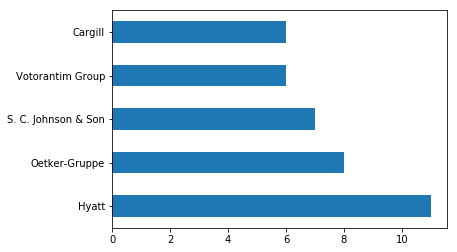

In [70]:
df["company"].value_counts().head(5).plot(kind="barh")

## 8) How much money do these billionaires have in total?

In [71]:
df["networthusbillion"].astype(float).sum()

6454.4000000000005

## 9) What are the top 3 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is total amount of money per country.

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," and "I want to add it all up." Just chain them all together.

In [75]:
df.groupby("countrycode")["networthusbillion"].sum().sort_values(ascending=False).head(3)

countrycode
USA    2322.4
RUS     422.5
DEU     401.4
Name: networthusbillion, dtype: float64

## 10) How old is an average billionaire? How old are billionaires self made vs. non self made? 

In [76]:
df["age"].mean()

63.342138364779878

In [77]:
selfmade = df[df["typeofwealth"] == "self-made finance"]
selfmade["age"].mean()

64.050295857988161

In [78]:
non_selfmade = df[df["typeofwealth"] != "self-made finance"]
non_selfmade["age"].mean()

63.150958466453673

In [79]:
df.groupby("typeofwealth")["age"].mean()

typeofwealth
executive                   63.679104
founder non-finance         63.496659
inherited                   64.962185
privatized and resources    57.319372
self-made finance           64.050296
Name: age, dtype: float64

## 11) Who are the youngest billionaires? Who are the oldest? Make a graph of the distribution of ages.

In [83]:
df.sort_values("age")["name"].head(3) #Show the 3 youngest

1172         Perenna Kei
397     Dustin Moskovitz
1004     Mark Zuckerberg
Name: name, dtype: object

In [84]:
df.sort_values("age", ascending=False)["name"].head(3) #show the 3 oldest

343    David Rockefeller, Sr.
816             Karl Wlaschek
836            Kirk Kerkorian
Name: name, dtype: object

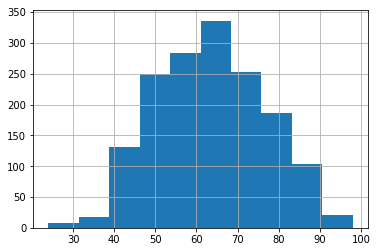

In [85]:
df["age"].hist() #show histogram for ages

## 12) Make a scatterplot of their net worth compared to their age

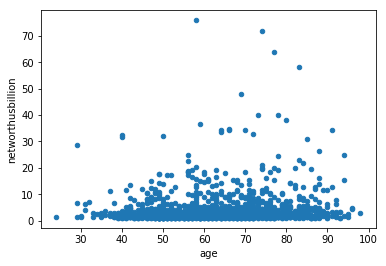

In [86]:
df.plot(kind="scatter", x="age", y="networthusbillion")

## 13) Make a bar graph of the top 10 richest billionaires

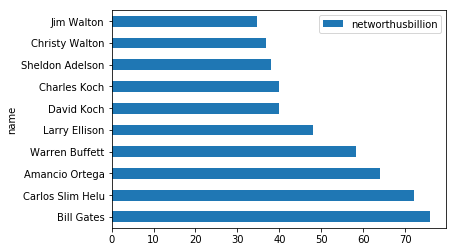

In [90]:
df.sort_values("networthusbillion", ascending=False).head(10).plot(kind="barh", x="name", y="networthusbillion")